In [102]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly


from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score
from sklearn.metrics import plot_confusion_matrix


In [103]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True) 

Mounted at /content/gdrive/


After this you can upload dataset to your Google Drive and run below command

## Data Analysis and Cleaning

In [104]:
data=pd.read_csv('gdrive/MyDrive/creditcard.csv')

In [105]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [106]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [107]:
data.describe().round(2).style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.860000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.350000,0.000000
std,47488.150000,1.960000,1.650000,1.520000,1.420000,1.380000,1.330000,1.240000,1.190000,1.100000,1.090000,1.020000,1.000000,1.000000,0.960000,0.920000,0.880000,0.850000,0.840000,0.810000,0.770000,0.730000,0.730000,0.620000,0.610000,0.520000,0.480000,0.400000,0.330000,250.120000,0.040000
min,0.000000,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-22.570000,-15.430000,0.000000,0.000000
25%,54201.500000,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-0.070000,-0.050000,5.600000,0.000000
50%,84692.000000,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,-0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000,0.010000,22.000000,0.000000
75%,139320.500000,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,0.090000,0.080000,77.160000,0.000000
max,172792.000000,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,7.130000,10.530000,8.880000,17.320000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,31.610000,33.850000,25691.160000,1.000000


In [108]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [109]:
data.duplicated().sum()

1081

In [110]:
data = data.drop_duplicates()

In [111]:
data.duplicated().sum()

0

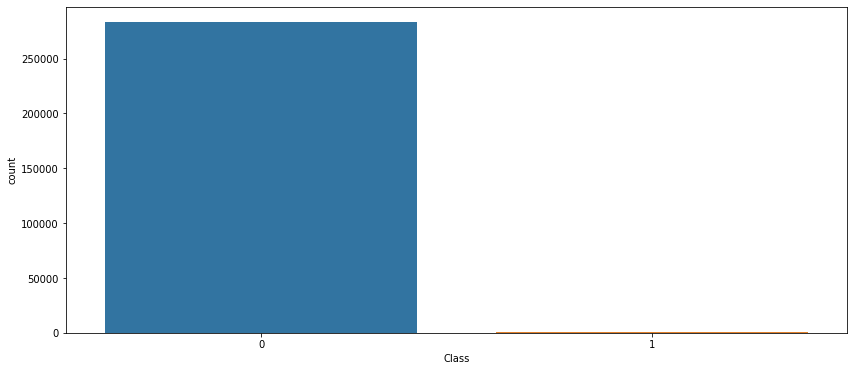

In [112]:
sns.countplot(x='Class',data=data)

In [113]:
lis=["Not Fraud","Frauds"]
fraud_or_not = data["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=data['Class'].value_counts(), names=lis , width=600, height=350)
fig.show()

## Data Scaling

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
std_scaler = StandardScaler()
data['Scaled_Amount']=std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [116]:
data.drop(['Amount','Time'],axis=1,inplace=True)

In [117]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


## Balance The Data

In [118]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [119]:
from imblearn.over_sampling import SMOTE 

In [120]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [121]:
fig = px.pie(values=y_resampled.value_counts(), width=600, height=350)
fig.show()

## Data Spliting

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

## Modling

### Naive bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
classifier=GaussianNB()
classifier.fit(X_train , y_train)

GaussianNB()

In [126]:
classifier.score(X_train , y_train).round(5)

0.91164

In [127]:
classifier.score(X_test , y_test).round(5)

0.91043

In [128]:
naive_preds=classifier.predict(X_test)

In [129]:
confusion_matrix(y_test,naive_preds)

array([[54984,  1477],
       [ 8671, 48170]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



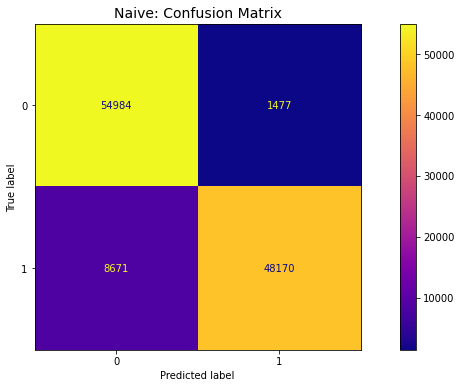

In [130]:
plot_confusion_matrix(classifier, X_test, y_test,cmap='plasma')
plt.title('Naive: Confusion Matrix', fontsize=14)
plt.show()

In [131]:
print(f'\t\tNaive Model has A:- \n\nAccuracy: {accuracy_score(y_test,naive_preds).round(4)}\t\trecall_Score: {recall_score(y_test,naive_preds).round(4)}\nPrecision_score: {precision_score(y_test,naive_preds).round(4)}\t\tF1-score equals: {f1_score(y_test,naive_preds).round(4)}')

		Naive Model has A:- 

Accuracy: 0.9104		recall_Score: 0.8475
Precision_score: 0.9702		F1-score equals: 0.9047


### Decision Tree

In [132]:
from sklearn.tree  import DecisionTreeClassifier

In [133]:
dt =DecisionTreeClassifier(max_features=8 , max_depth=6)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6, max_features=8)

In [134]:
dt.score(X_train , y_train).round(5)

0.9499

In [135]:
dt.score(X_test , y_test).round(5)

0.95012

In [136]:
Name_features=X.columns
FeatureImportances=pd.DataFrame(dt.feature_importances_,index=Name_features).sort_values(by=0,axis = 0, ascending = False)

In [137]:
fig = px.bar(FeatureImportances.head()) 
fig.show()

In [138]:
DT_preds=dt.predict(X_test)

In [139]:
confusion_matrix(y_test,DT_preds)

array([[54166,  2295],
       [ 3357, 53484]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



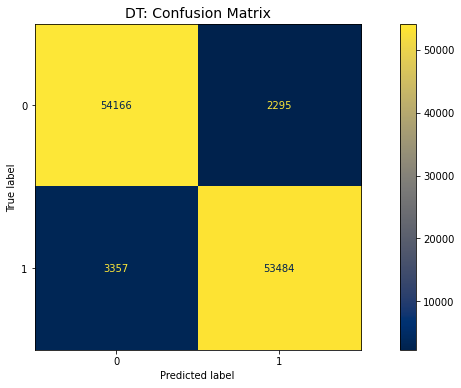

In [140]:
plot_confusion_matrix(dt, X_test, y_test,cmap='cividis')
plt.title('DT: Confusion Matrix', fontsize=14)
plt.show()

In [141]:
print(f'\t\tDT Model has A:- \n\nAccuracy: {accuracy_score(y_test,DT_preds).round(4)}\t\trecall_Score: {recall_score(y_test,DT_preds).round(4)}\nPrecision_score: {precision_score(y_test,DT_preds).round(4)}\t\tF1-score equals: {f1_score(y_test,DT_preds).round(4)}')

		DT Model has A:- 

Accuracy: 0.9501		recall_Score: 0.9409
Precision_score: 0.9589		F1-score equals: 0.9498


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     56461
           1       0.96      0.94      0.95     56841

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



### Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
lr = LogisticRegression(C = 100)
lr.fit(X_train , y_train)

LogisticRegression(C=100)

In [145]:
lr.score(X_train , y_train).round(5)

0.94423

In [146]:
lr.score(X_test , y_test).round(5)

0.94493

In [147]:
LR_preds=lr.predict(X_test)

In [148]:
confusion_matrix(y_test,LR_preds)

array([[55058,  1403],
       [ 4836, 52005]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



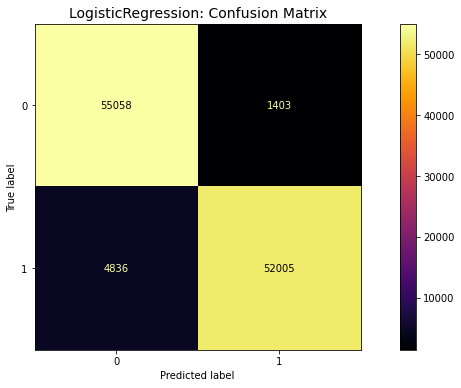

In [149]:
plot_confusion_matrix(lr, X_test, y_test,cmap='inferno')
plt.title('LogisticRegression: Confusion Matrix', fontsize=14)
plt.show()

In [150]:
print(f'\t\tLR Model has A:- \n\nAccuracy: {accuracy_score(y_test,LR_preds).round(4)}\t\trecall_Score: {recall_score(y_test,LR_preds).round(4)}\nPrecision_score: {precision_score(y_test,LR_preds).round(4)}\t\tF1-score equals: {f1_score(y_test,LR_preds).round(4)}')

		LR Model has A:- 

Accuracy: 0.9449		recall_Score: 0.9149
Precision_score: 0.9737		F1-score equals: 0.9434


In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56461
           1       0.97      0.91      0.94     56841

    accuracy                           0.94    113302
   macro avg       0.95      0.95      0.94    113302
weighted avg       0.95      0.94      0.94    113302



## Models Comparision

creating dictionary for storing different models accuracy

In [161]:
model_comparison={}
model_comparison['Decision Tree']=[accuracy_score(y_test,DT_preds),f1_score(y_test,DT_preds,average='weighted'),precision_score(y_test,DT_preds),recall_score(y_test,DT_preds)]
model_comparison['Naive']=[accuracy_score(y_test,naive_preds),f1_score(y_test,naive_preds,average='weighted'),precision_score(y_test,naive_preds),recall_score(y_test,naive_preds)]                                   
model_comparison['Logistic Regression']=[accuracy_score(y_test,LR_preds),f1_score(y_test,LR_preds,average='weighted'),precision_score(y_test,LR_preds),recall_score(y_test,LR_preds)] 

In [162]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','precision','recall']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}")

,Model Accuracy,Model F1-Score,precision,recall
Decision Tree,95.01%,95.01%,95.89%,94.09%
Logistic Regression,94.49%,94.49%,97.37%,91.49%
Naive,91.04%,91.01%,97.02%,84.75%


In [163]:
fig = px.bar(Model_com_df['Model Accuracy']) 
fig.show()